In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

In [2]:
file_paths = [
	'./fix_data/df_2008.csv',
	'./fix_data/df_2009.csv',
	'./fix_data/df_2010.csv',
	'./fix_data/df_2011.csv',
	'./fix_data/df_2012.csv',
	'./fix_data/df_2013.csv',
	'./fix_data/df_2014.csv',
	'./fix_data/df_2015.csv',
	'./fix_data/df_2016.csv',
	'./fix_data/df_2017.csv',
	'./fix_data/df_2018.csv'
]


df_list = [pd.read_csv(file_path) for file_path in file_paths]

In [3]:
re_df = df_list[-1]
df = df_list[0]

### Draw certain conclusions by creating visuals to communicate the changes in the cars in span of 10 years.


#### Are more unique models using alternative fuels in 2018 compared to other years? By how much?

In [4]:
alternative_fuels = ["Ethanol", "CNG", "Electricity"]

In [5]:
data_count = []
for data in df_list:
  data_count.append(data[data['Fuel'].isin(alternative_fuels)]['Vehicle_Model'].nunique())

In [6]:
data_count

[33, 44, 49, 71, 75, 80, 84, 72, 57, 53, 60]

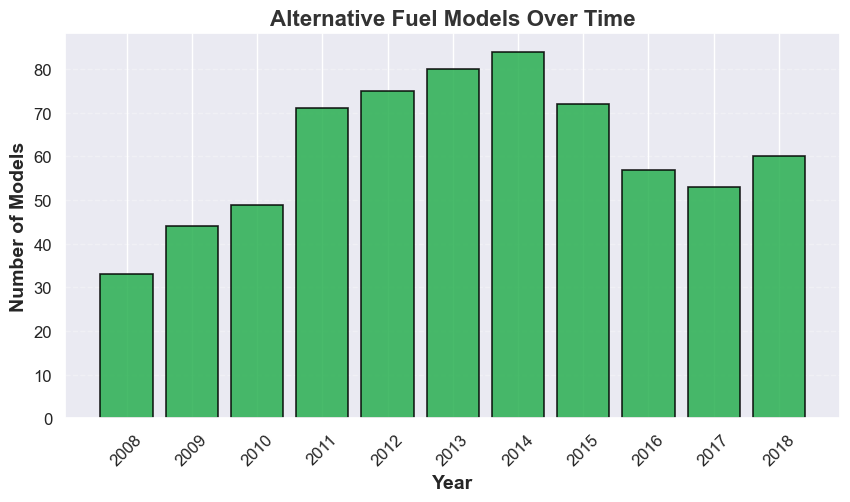

In [7]:
# Sample data (replace with actual data_count)
years = [f"20{i+8:02}" for i in range(len(data_count))]
plt.figure(figsize=(10, 5))  # Bigger size

# Create bars with better aesthetics
plt.bar(years, data_count, color="#29AF51FF", edgecolor="black", linewidth=1.2, alpha=0.85)

# Improve labels & title
plt.xlabel("Year", fontsize=14, fontweight="bold")
plt.ylabel("Number of Models", fontsize=14, fontweight="bold")
plt.title("Alternative Fuel Models Over Time", fontsize=16, fontweight="bold", color="#333")

# Improve x-axis ticks
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add a subtle grid
plt.grid(axis="y", linestyle="--", alpha=0.3)

# Show plot
plt.show()

In [8]:
total_count = []

for data in df_list:
  total_count.append(data['Vehicle_Model'].nunique())

total_count

[411, 450, 469, 484, 490, 513, 545, 580, 591, 603, 631]

In [9]:
proportion_value = []
for count, total in zip(data_count, total_count):
    proportion_value.append((count / total) * 100)

print(proportion_value)


[8.02919708029197, 9.777777777777779, 10.44776119402985, 14.669421487603307, 15.306122448979592, 15.594541910331383, 15.412844036697248, 12.413793103448276, 9.644670050761421, 8.7893864013267, 9.508716323296355]


In [10]:
for i in range(len(proportion_value)):
  print(f"{years[i]}: {proportion_value[i]:.2f}%")

2008: 8.03%
2009: 9.78%
2010: 10.45%
2011: 14.67%
2012: 15.31%
2013: 15.59%
2014: 15.41%
2015: 12.41%
2016: 9.64%
2017: 8.79%
2018: 9.51%


1. Peak in 2014: The number of unique alternative fuel models reached its highest at 84 models in 2014.
2. Decline after 2014: The count dropped significantly in 2015 and remained lower until 2018.
3. 2018 vs. Other Years:
  	* 2018 had 60 alternative fuel models, which is lower than the peak (2014: 84) but higher than 2016 & 2017.
  	*  The proportion of alternative fuel models in 2018 was 9.51%, slightly higher than 2017 (8.79%) but still below the peak years (2011-2014).

### How much have vechicle classes improved in fuel economy (increased in mpg) per year?

In [11]:
veh = df.groupby('Veh_Class').Combined_Mpg.mean()
veh

Veh_Class
SUV              17.930982
large car        18.323308
midsize car      21.370504
minivan          18.666667
pickup           16.139785
small car        21.066378
station wagon    22.349593
van              14.206897
Name: Combined_Mpg, dtype: float64

In [12]:
re_veh = re_df.groupby('Veh_Class').Combined_Mpg.mean()
re_veh

Veh_Class
large car          24.337838
midsize car        30.214932
minivan            26.384615
pickup             18.273438
small SUV          24.271008
small car          25.570930
special purpose    19.684211
standard SUV       19.370000
station wagon      29.972973
van                15.166667
Name: Combined_Mpg, dtype: float64

In [13]:
veh = df_list[10].groupby('Veh_Class').Combined_Mpg.mean()
veh

Veh_Class
large car          24.337838
midsize car        30.214932
minivan            26.384615
pickup             18.273438
small SUV          24.271008
small car          25.570930
special purpose    19.684211
standard SUV       19.370000
station wagon      29.972973
van                15.166667
Name: Combined_Mpg, dtype: float64

In [14]:
veh_group = {}
start_year = 2008

for i, df in enumerate(df_list):
  year = start_year + i
  mpg_by_class = df.groupby('Veh_Class')['Combined_Mpg'].mean()
  veh_group[year] = mpg_by_class
  
veh_group_df = pd.DataFrame(veh_group).T
veh_group_df = veh_group_df.sort_index(axis=1)
veh_group_df

Veh_Class,SUV,large car,midsize car,minivan,pickup,small SUV,small car,special purpose,standard SUV,station wagon,van
2008,17.930982,18.323308,21.370504,18.666667,16.139785,NaN,21.066378,NaN,NaN,22.349593,14.206897
2009,18.126565,18.461538,21.851301,19.000000,16.245675,NaN,21.557055,NaN,NaN,22.908046,14.129032
2010,19.098305,18.296296,22.154639,18.666667,16.322222,NaN,22.204106,23.000000,NaN,23.962733,13.350000
2011,19.313559,19.070922,23.225926,19.720000,16.513966,NaN,22.626359,16.333333,NaN,24.347826,12.301887
2012,19.278481,18.880503,24.494774,19.947368,16.289157,NaN,23.298387,17.600000,NaN,24.871212,12.051724
2013,NaN,20.000000,26.277045,20.080000,16.076433,22.176638,24.036748,19.111111,16.327731,25.451923,12.568966
2014,NaN,20.888889,26.966216,20.040000,16.851240,22.389535,24.977199,21.470588,16.784091,25.146341,12.203704
2015,NaN,21.360360,26.838942,20.040000,17.939130,23.189702,25.128497,19.352941,18.118143,27.160920,11.920000
2016,NaN,21.887387,27.520971,19.461538,18.085000,23.529833,25.765510,20.410256,19.303249,27.319149,13.285714
2017,NaN,23.097959,29.142518,25.714286,18.040541,23.220930,25.379863,19.837838,19.156794,28.734513,13.285714


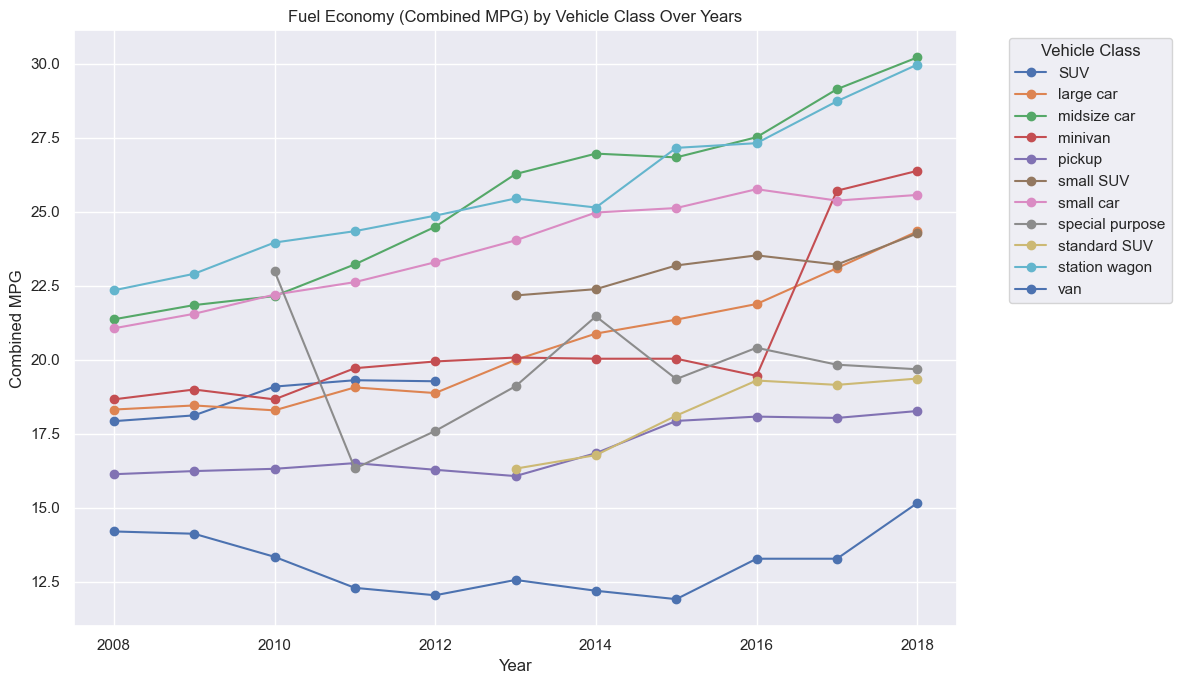

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
for column in veh_group_df.columns:
    plt.plot(veh_group_df.index, veh_group_df[column],marker='o', label=column)

plt.title("Fuel Economy (Combined MPG) by Vehicle Class Over Years")
plt.xlabel("Year")
plt.ylabel("Combined MPG")
plt.legend(title='Vehicle Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


Midsize cars and station wagons got ridiculously fuel efficient over time — like they trained with Olympic runners.

Vans... well, they’re still gas-guzzling tanks. Slow and steady loses the race here.

Small cars and small SUVs steadily climbed the MPG ladder like they had a mission to save the planet.

Pickups stayed loyal to their fuel-chugging roots. Slight progress, but they still guzzle gas like it's happy hour.

---

Most Improved (2008 → 2018)

In [16]:
data = veh_group_df.T[[2008, 2018]]
data

,2008,2018
Veh_Class,,
SUV,17.930982,NaN
large car,18.323308,24.337838
midsize car,21.370504,30.214932
minivan,18.666667,26.384615
pickup,16.139785,18.273438
small SUV,NaN,24.271008
small car,21.066378,25.570930
special purpose,NaN,19.684211
standard SUV,NaN,19.370000


In [17]:
data['improve'] = data[2018] - data[2008]
data

,2008,2018,improve
Veh_Class,,,
SUV,17.930982,NaN,NaN
large car,18.323308,24.337838,6.014530
midsize car,21.370504,30.214932,8.844429
minivan,18.666667,26.384615,7.717949
pickup,16.139785,18.273438,2.133653
small SUV,NaN,24.271008,NaN
small car,21.066378,25.570930,4.504552
special purpose,NaN,19.684211,NaN
standard SUV,NaN,19.370000,NaN


In [18]:
data.loc['SUV'][2018]

np.float64(nan)

In [19]:
data.loc['SUV', 2018] = (data.loc['small SUV', 2018] + data.loc['standard SUV', 2018]) / 2
data

,2008,2018,improve
Veh_Class,,,
SUV,17.930982,21.820504,NaN
large car,18.323308,24.337838,6.014530
midsize car,21.370504,30.214932,8.844429
minivan,18.666667,26.384615,7.717949
pickup,16.139785,18.273438,2.133653
small SUV,NaN,24.271008,NaN
small car,21.066378,25.570930,4.504552
special purpose,NaN,19.684211,NaN
standard SUV,NaN,19.370000,NaN


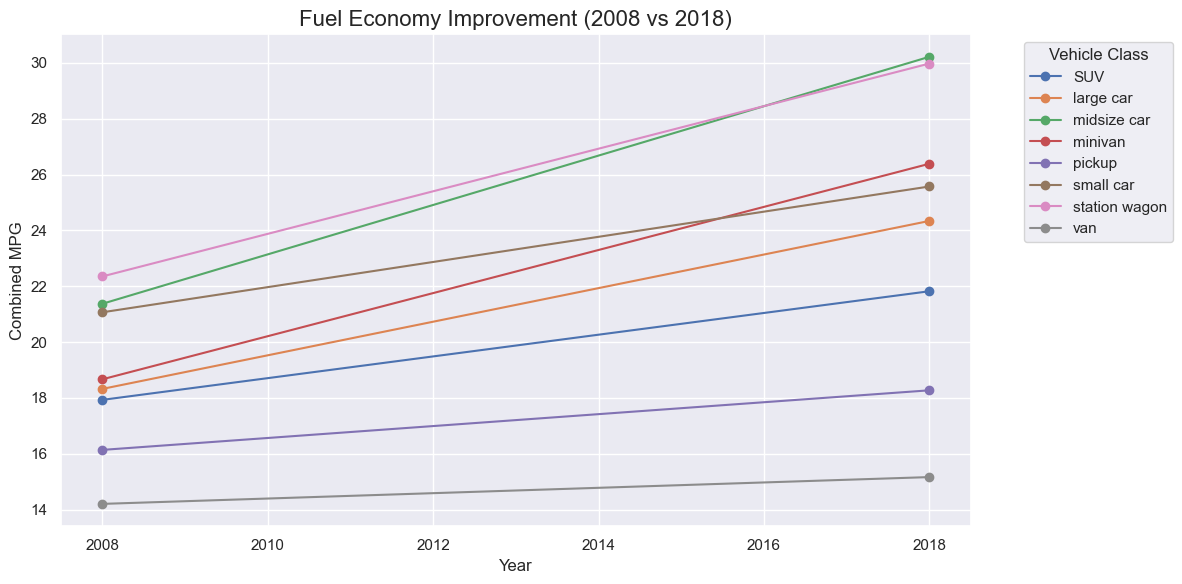

In [20]:
mpg_df = data.T[['SUV','large car', 'midsize car', 'minivan', 'pickup', 'small car', 'station wagon', 'van']].head(2)

mpg_df

plt.figure(figsize=(12, 6))
for col in mpg_df.columns:
  plt.plot(mpg_df.index, mpg_df[col], marker='o', label=col)

plt.title('Fuel Economy Improvement (2008 vs 2018)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Combined MPG')
plt.legend(title="Vehicle Class", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

midsize cars, station wagons, and minivans made the biggest leaps, while vans and pickups... well, let’s just say they tried. 😅

- Most Improvement = midsize car -> nearly 9 MPG in a decade

- Best MPG in 2018 = midsize car with 30.21

In [21]:
# Calculate percentage improvement
improvement = ((data[2018] - data[2008]) / data[2008]) * 100

# Sort by improvement (optional)
improvement = improvement.sort_values(ascending=False)


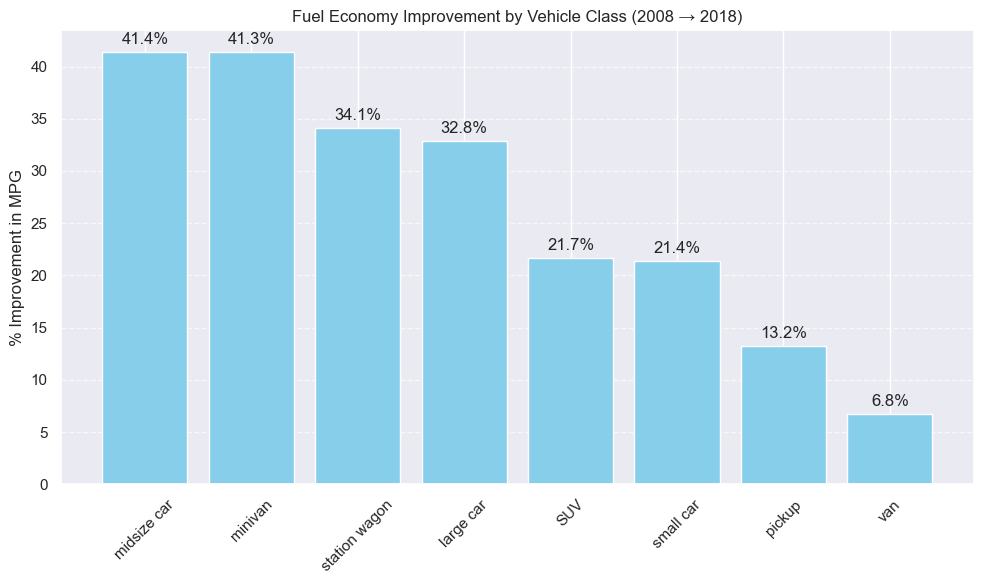

In [22]:
plt.figure(figsize=(10,6))
bars = plt.bar(improvement.index, improvement.values, color='skyblue')
plt.xticks(rotation=45)
plt.ylabel('% Improvement in MPG')
plt.title('Fuel Economy Improvement by Vehicle Class (2008 → 2018)')

# Add labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Let's try to group them 

In [23]:
group_map = {
    "SUV": "SUV",
    "small SUV": "SUV",
    "standard SUV": "SUV",
    "large car": "large car",
    "midsize car": "midsize car",
    "small car": "small car",
    "minivan": "minivan",
    "van": "Van",
    "station wagon": "station wagon",
    "pickup": "Pickup",
    "special purpose": "Other",
}

group_data = {}
for year, columns in veh_group.items():
  group_data[year] = {}
  for cls, mpg in columns.items():
    group = group_map.get(cls)
    if group not in group_data[year]:
      group_data[year][group] = []
    group_data[year][group].append(mpg)
    


In [24]:
df_grouped = pd.DataFrame({
    year: {group: sum(vals) / len(vals) for group, vals in data.items()}
    for year, data in group_data.items()
}).T

In [25]:
df_grouped

,SUV,large car,midsize car,minivan,Pickup,small car,station wagon,Van,Other
2008,17.930982,18.323308,21.370504,18.666667,16.139785,21.066378,22.349593,14.206897,NaN
2009,18.126565,18.461538,21.851301,19.000000,16.245675,21.557055,22.908046,14.129032,NaN
2010,19.098305,18.296296,22.154639,18.666667,16.322222,22.204106,23.962733,13.350000,23.000000
2011,19.313559,19.070922,23.225926,19.720000,16.513966,22.626359,24.347826,12.301887,16.333333
2012,19.278481,18.880503,24.494774,19.947368,16.289157,23.298387,24.871212,12.051724,17.600000
2013,19.252185,20.000000,26.277045,20.080000,16.076433,24.036748,25.451923,12.568966,19.111111
2014,19.586813,20.888889,26.966216,20.040000,16.851240,24.977199,25.146341,12.203704,21.470588
2015,20.653923,21.360360,26.838942,20.040000,17.939130,25.128497,27.160920,11.920000,19.352941
2016,21.416541,21.887387,27.520971,19.461538,18.085000,25.765510,27.319149,13.285714,20.410256
2017,21.188862,23.097959,29.142518,25.714286,18.040541,25.379863,28.734513,13.285714,19.837838


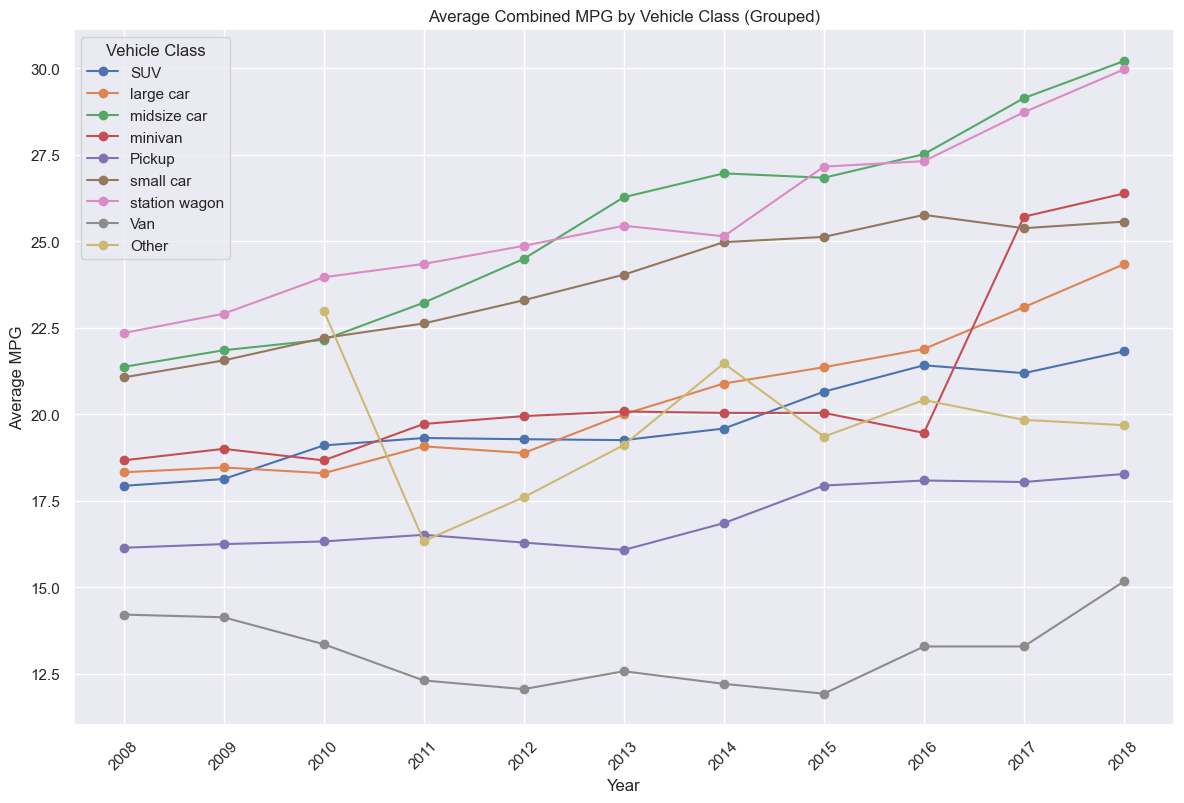

In [26]:
plt.figure(figsize=(12, 8))
for col in df_grouped.columns:
    plt.plot(df_grouped.index, df_grouped[col], marker='o', label=col)

plt.title("Average Combined MPG by Vehicle Class (Grouped)")
plt.xlabel("Year")
plt.ylabel("Average MPG")
plt.legend(title="Vehicle Class")
plt.grid(True)
plt.tight_layout()
plt.xticks(df_grouped.index, rotation=45)
plt.show()

#### What are the characteristics of SmartWay vechicles? Have they changed over time? (mpg, greenhouse gas)


#### What are SmartWay Certified Vehicles?

> Each model year, EPA rates every new car, truck, and Sport Utility Vehicle (SUV) for **greenhouse gas** and **smog-forming emissions (air pollution)** on scales of 1-10. To earn the SmartWay designation, a vehicle must receive a combined score from both scales that is much better than the average vehicle. SmartWay Elite certification is given to only those vehicles that attain the highest scores on both scales. Reference: [https://www.epa.gov/greenvehicles/consider-smartway-vehicle](https://www.epa.gov/greenvehicles/consider-smartway-vehicle)

#### Greenhouse Gas Rating

> This rating reflects vehicle tailpipe emissions that contribute to local and regional air pollution, creating problems such as smog, haze, and health issues. Vehicles that score a 10 are the cleanest. Reference: [https://www.epa.gov/greenvehicles/smog-rating](https://www.epa.gov/greenvehicles/smog-rating)

#### Smog (Air Pollution) Rating

> This rating reflects vehicle tailpipe emissions that contribute to local and regional air pollution, creating problems such as smog, haze, and health issues. Vehicles that score a 10 are the cleanest. Reference: [https://www.epa.gov/greenvehicles/smog-rating](https://www.epa.gov/greenvehicles/smog-rating)


In [27]:
df_list[0]['Smartway'].value_counts()

Smartway
No     1623
Yes     632
Name: count, dtype: int64

In [28]:
df = df_list[0].query('Smartway == "Yes"')
df.describe()

,Engine_Displacement_L,Engine_Cylinders,Drive,Air_Pollution_Score,City_Mpg,Hwy_Mpg,Combined_Mpg,Greenhouse_Gas_Score
count,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000
mean,2.497943,4.678797,2.212025,6.985759,21.450949,28.886076,24.199367,7.026899
std,0.584164,0.940206,0.616195,1.143002,3.481552,3.079454,3.070456,0.798714
min,1.300000,4.000000,2.000000,6.000000,17.000000,22.000000,20.000000,6.000000
25%,2.000000,4.000000,2.000000,6.000000,20.000000,27.000000,22.000000,6.000000
50%,2.400000,4.000000,2.000000,7.000000,21.000000,29.000000,24.000000,7.000000
75%,2.900000,6.000000,2.000000,7.000000,23.000000,31.000000,25.000000,7.000000
max,5.000000,8.000000,4.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [29]:
df_list[-1]['Smartway'].value_counts()

Smartway
No       2377
Yes       340
Elite      94
Name: count, dtype: int64

In [30]:
rf = df_list[-1].query('Smartway in ["Yes", "Elite"]')

In [31]:
new_data = []

for data in df_list:
	new_data.append(data.query('Smartway in ["Yes", "Elite"]'))

In [32]:
describe_data = []
for data in new_data:
  describe_data.append(data[['Greenhouse_Gas_Score', 'Air_Pollution_Score', 'Combined_Mpg']].mean())	

In [33]:
describe_data[0]

Greenhouse_Gas_Score     7.026899
Air_Pollution_Score      6.985759
Combined_Mpg            24.199367
dtype: float64

In [34]:
new_data[6]['Smartway'].count()

np.int64(608)

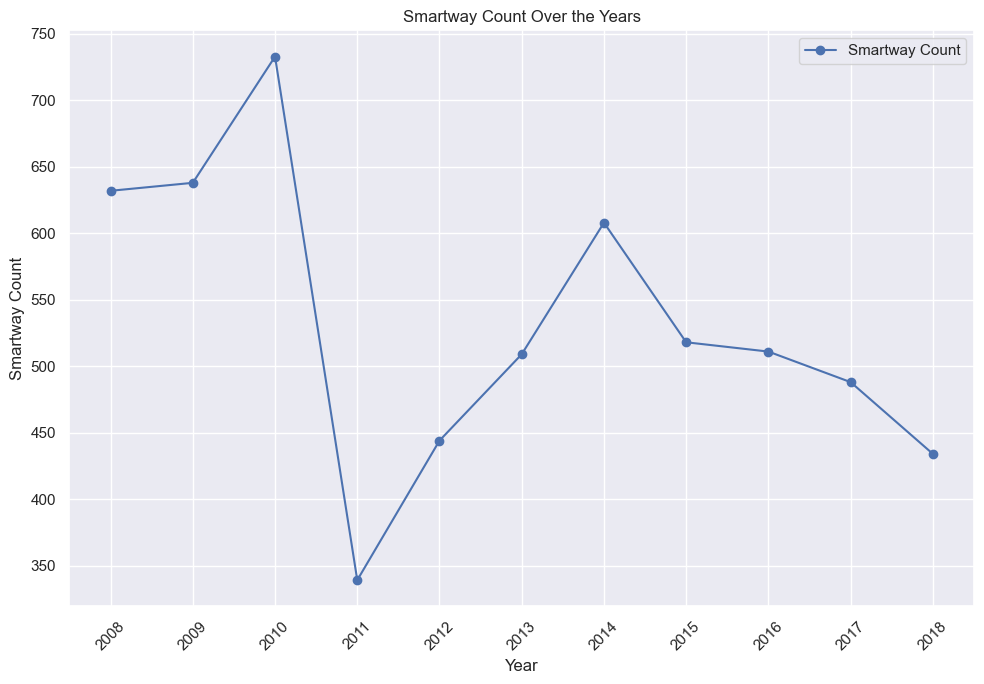

In [35]:

years = []
counts = []

plt.figure(figsize=(10, 7))

# Gather x and y values
for i, data in enumerate(new_data):
    year = i + 2008
    count = data['Smartway'].count()
    years.append(year)
    counts.append(count)

# Plot once to connect points
plt.plot(years, counts, marker='o', linestyle='-', color='b', label='Smartway Count')

plt.title("Smartway Count Over the Years")
plt.xlabel("Year")
plt.ylabel("Smartway Count")
plt.grid(True)
plt.xticks(years, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

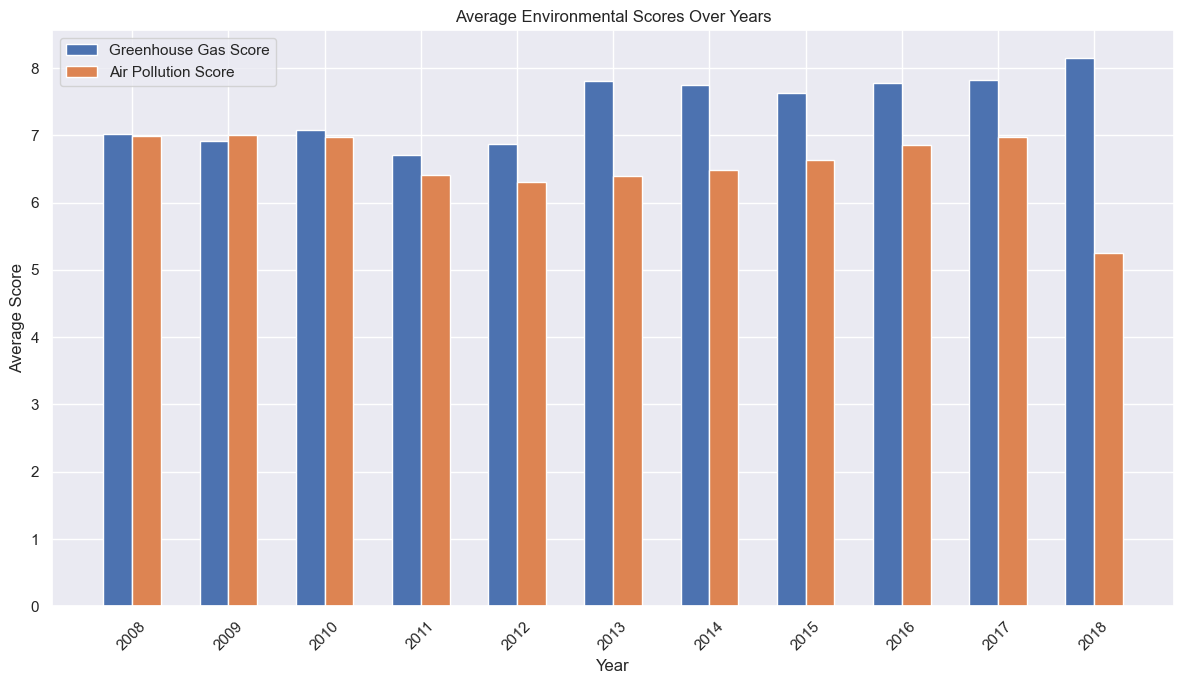

In [36]:
import matplotlib.pyplot as plt
import numpy as np

years = np.array([i + 2008 for i in range(len(describe_data))])

# Extract each metric over the years
ghg_scores = [d['Greenhouse_Gas_Score'] for d in describe_data]
air_pollution_scores = [d['Air_Pollution_Score'] for d in describe_data]

# Plotting
plt.figure(figsize=(12, 7))
width = 0.3

plt.bar(years - width/2, ghg_scores, label='Greenhouse Gas Score', width=width)
plt.bar(years + width/2, air_pollution_scores, label='Air Pollution Score', width=width)

plt.title("Average Environmental Scores Over Years")
plt.xlabel("Year")
plt.ylabel("Average Score")
plt.grid(True, axis='y')
plt.legend()
plt.xticks(years, rotation=45)
plt.tight_layout()
plt.show()


The average greenhouse gas score has increased from 7 to 8.2, but air pollution average score has dropped from 6.9 to 5.2. This seems strange - what does the drop in smog rating means?

it says
>Model year 2018 and later: The smog rating chart has been recalibrated to reflect new, more stringent Tier 3 emission standards. This is good news, as Tier 3 cars and trucks are much cleaner. This recalibration makes better use of the entire smog rating scale and allows for more useful comparisons between vehicles. **Please note: Even though ratings appear to be going down, vehicles are not getting dirtier. A MY 2018 and later smog rating of 3 is about the same as a MY 2017 smog rating of 6.**

###  What features are associated with better fuel economy(mpg)?

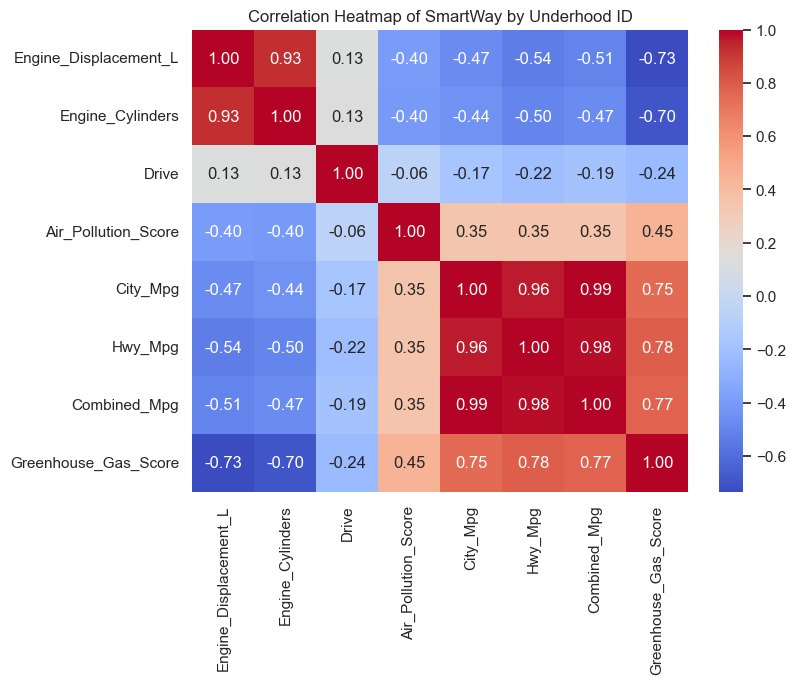

In [37]:
new = df_list[-1]

corr_matrix = new.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of SmartWay by Underhood ID")
plt.show()


The minimum, maximum and average mileage for city, highway and combined has increased from 2008 to 2018

This is also reflected in low air pollution and greenhouse gas score

With less value of Engine Cylinders and displacement L , the average mileage has increased from 2008 to 2018